In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ( confusion_matrix, accuracy_score, precision_score, recall_score , f1_score, roc_curve, RocCurveDisplay , roc_auc_score )
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
data= pd.read_csv(r"C:\Users\hp\Downloads\elevate labs intership\project\WA_Fn-UseC_-HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8



#### Since Attrition is target variable Visualizing the count of values in it.

C:\Users\hp\AppData\Local\Temp\ipykernel_18396\3981004317.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Attrition', palette='Set2')


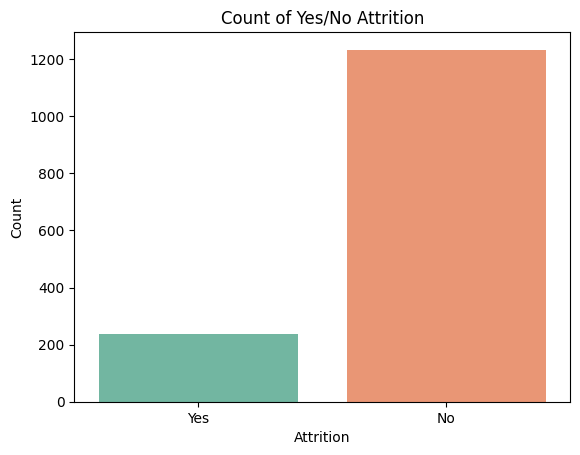

In [4]:
sns.countplot(data=data, x='Attrition', palette='Set2')

plt.title('Count of Yes/No Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [5]:
dim= pd.DataFrame({"":["rows","columns"], "count" : data.shape})
dim

,,count
0,rows,1470
1,columns,35


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [7]:
col_info = pd.DataFrame({"dtypes" : data.dtypes,
                         "null_values" : data.isnull().sum() })
col_info

,dtypes,null_values
Age,int64,0
Attrition,object,0
BusinessTravel,object,0
DailyRate,int64,0
Department,object,0
DistanceFromHome,int64,0
Education,int64,0
EducationField,object,0
EmployeeCount,int64,0
EmployeeNumber,int64,0


 * #### There are no missing values but we have categorical values in some columns.


<Axes: >

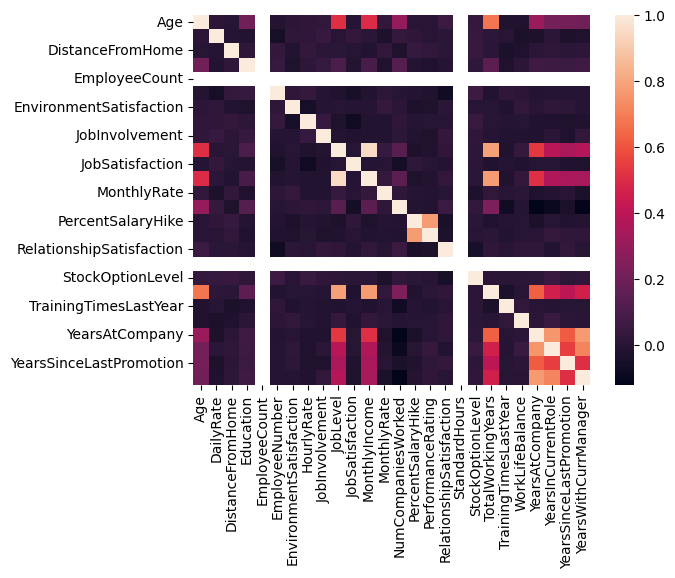

In [8]:
 corr = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr)

#### Removing highly correlated and non correlated variables


In [9]:
data.drop(['EmployeeCount'],axis=1,inplace=True)
data.drop(['RelationshipSatisfaction'],axis=1,inplace=True)
data.drop(['StockOptionLevel'],axis=1,inplace=True)
data.drop(['TrainingTimesLastYear'],axis=1,inplace=True)
data.drop(['StandardHours'],axis=1,inplace=True)
data.drop(['JobLevel'],axis=1,inplace=True)

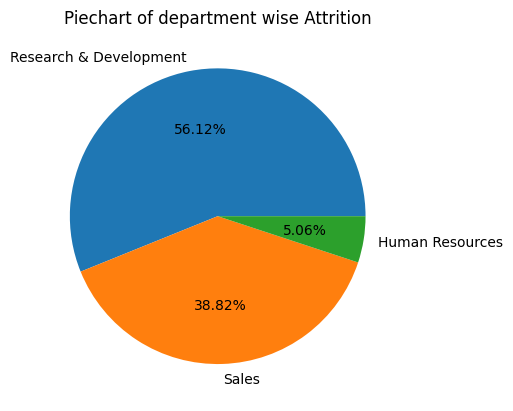

In [10]:
Attrition_yes = data[data['Attrition']=="Yes"]
dept_count = Attrition_yes["Department"].value_counts()
plt.pie(dept_count,labels =dept_count.index, autopct='%1.2f%%')
plt.title("Piechart of department wise Attrition")
plt.show()

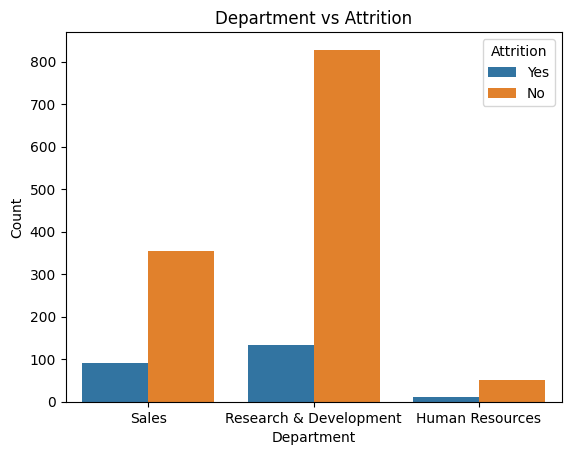

In [11]:
sns.countplot(data=data, x='Department', hue='Attrition')

plt.title('Department vs Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

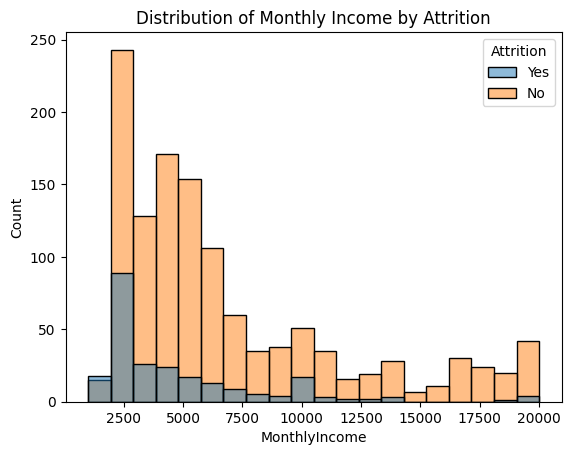

In [12]:
sns.histplot(data=data, x='MonthlyIncome', hue='Attrition')
plt.title('Distribution of Monthly Income by Attrition')
plt.show()

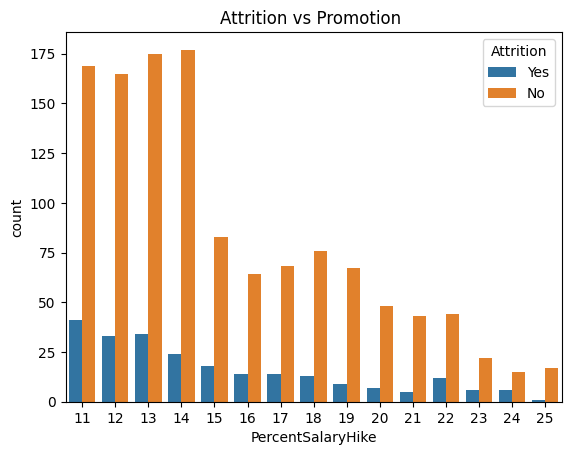

In [13]:
sns.countplot(data=data, x='PercentSalaryHike', hue = 'Attrition')
plt.title('Attrition vs Promotion ')
plt.show()

### splitting the data first to ensure there is no data leakage while encoding and scaling

In [14]:
x= data.drop(columns = ["Attrition"])
y=data["Attrition"].map({"Yes" :1,"No" : 0})  # converting y values into binary

x_train,x_test,y_train,y_test=train_test_split(x,y, train_size = 0.80 , random_state = 12, stratify = y)

In [15]:
cat_var = x.select_dtypes(include = "object").columns
print(cat_var)

num_var= x.select_dtypes(include=["int","float"]).columns
print(num_var)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


  #### The categorical variables are NOMINAL.Therefore using "ONE-HOT ENCODING" method.

In [16]:
x_train_cat=pd.get_dummies(x_train[cat_var],columns=cat_var, drop_first = True)
x_test_cat=pd.get_dummies(x_test[cat_var],columns=cat_var, drop_first = True)
# Align columns in case test set misses some categories
x_train_cat, x_test_cat = x_train_cat.align(x_test_cat, join='left', axis=1, fill_value=0)


#### Standardizing all the numeric variables.


In [17]:
x_train_num=pd.DataFrame(StandardScaler().fit_transform(x_train[num_var]),columns=num_var , index = x_train.index)
x_test_num=pd.DataFrame(StandardScaler().fit_transform(x_test[num_var]),columns=num_var , index = x_test.index)

#### Combining encoded cat_var and scaled num_var

In [18]:
x_train_final= pd.concat([x_train_cat, x_train_num],axis =1)
x_test_final= pd.concat([x_test_cat, x_test_num],axis =1)
print(type(x_train))
print(type(x_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


 ## Logistic Regression model


* ### Training model

In [19]:
model = LogisticRegression()
model.fit(x_train_final, y_train)

LogisticRegression()

* ### Prediction

In [20]:
y_pred=model.predict(x_test_final)

* ### Model Evaluation

In [21]:
accuracy= accuracy_score(y_test,y_pred)
print("ACCURACY = ", accuracy)

precision = precision_score(y_test,y_pred)
print("Precision =", precision)

recall= recall_score(y_test, y_pred)
print("Recall = ", recall)

F1_score= f1_score(y_test, y_pred)
print("F1_score = " , F1_score)

AUC= roc_auc_score(y_test,y_pred)
print("AUC = ", AUC)


ACCURACY =  0.8741496598639455
Precision = 0.6666666666666666
Recall =  0.425531914893617
F1_score =  0.5194805194805194
AUC =  0.6925230424670513


## INTERPRETATION
* #### The model has achieved the accuracy of 87.41% but the classes here are not balanced we can't relay on accuracy.
* #### The precision value is 66.66% . Which means the predicted positive conditions are mostly correct.
* #### The Recall value is 42.55 % .Therefore there is chance of not identifying the positive condition.
* #### The F1 score is 51.94% which indicate moderate accuracy.
* #### The AUC score is 69.25% which indicates it as a fair model.

## VISUALISION

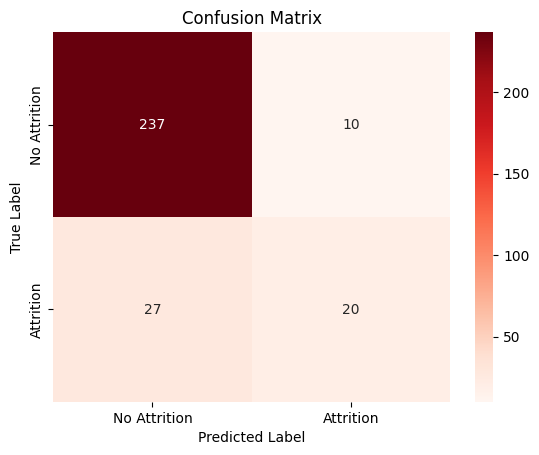

In [22]:
con_mat= confusion_matrix(y_test,y_pred)

sns.heatmap(con_mat , annot = True, fmt = "d", cmap = "Reds",
           xticklabels=['No Attrition', 'Attrition'], 
            yticklabels=['No Attrition', 'Attrition'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

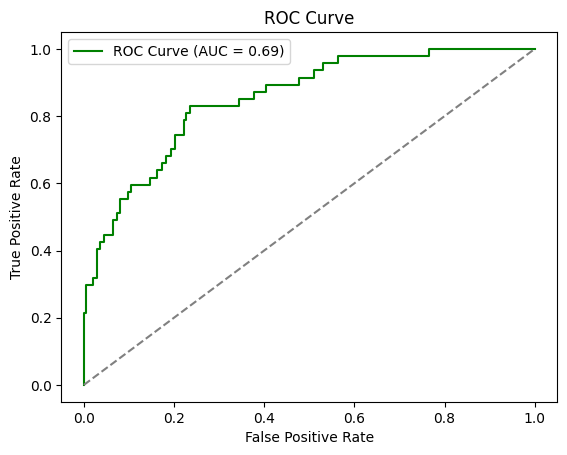

In [23]:
y_prob = model.predict_proba(x_test_final)[:, 1] 
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, color='green', label=f'ROC Curve (AUC = {AUC:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## CONCLUSION :
### The model is good enough . Though the accuracy is 87.41 % and precision is 66.66%, due to low recall we might miss on some true attritions but model is reasonably good .

## SHAP Analysis

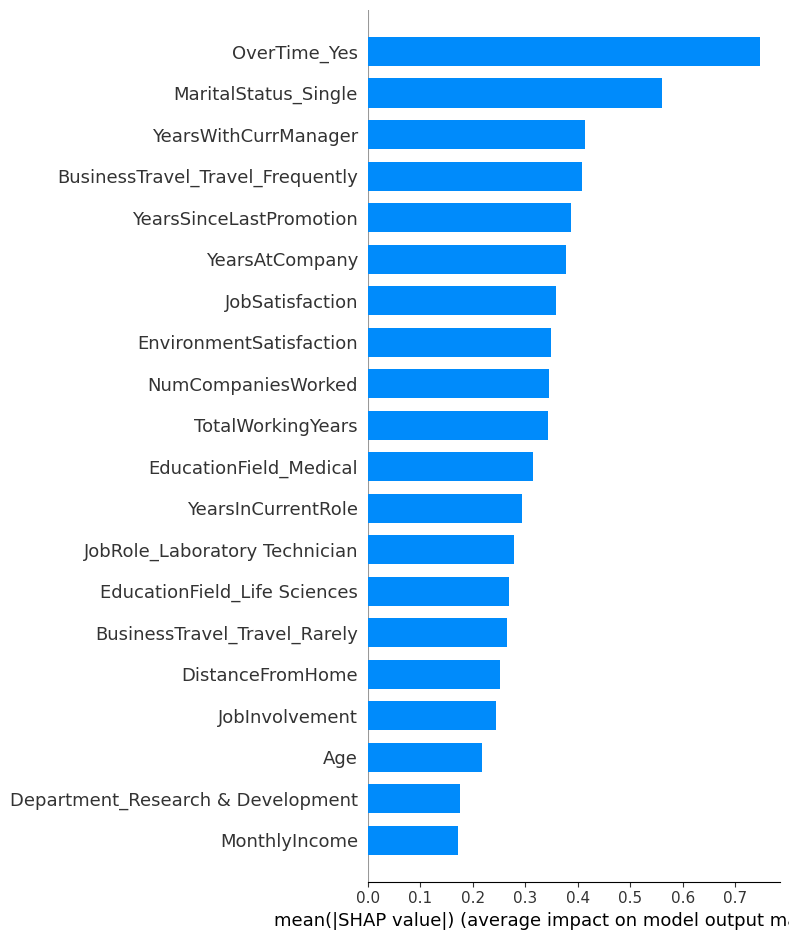

In [24]:
explainer = shap.Explainer(model, x_train_final)
shap_values = explainer(x_test_final)

shap.summary_plot(shap_values, x_test_final, plot_type="bar")

#### In the above plot we can clearly see which factor infulence the model more . And the top one that influences is the "OverTime_yes"

## THANK YOU
